In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler


In [15]:
def MeanSquareError(y_act,y_predicted):
    y_test = list(y_act)
    y_pred = list(y_predicted)
    n = len(y_test)
    error = 0.0;
    for i in range(0,n):
        error+=(y_test[i]-y_pred[i])**2
    return error/n

def RootMeanSquareError(y_act,y_predicted):
    y_test = list(y_act)
    y_pred = list(y_predicted)
    n = len(y_test)
    error = 0.0;
    for i in range(0,n):
        error+=(y_test[i]-y_pred[i])**2
    return (error/n)**0.5


def MeanAbsoluteError(y_act,y_predicted):
    y_test = list(y_act)
    y_pred = list(y_predicted)
    n = len(y_test)
    error = 0.0;
    for i in range(0,n):
        error+=abs(y_test[i]-y_pred[i])
    return (error/n)

def MeanAbsolutePercentageError(y_act,y_predicted):
    y_test = (y_act)
    y_pred = (y_predicted)

    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape


def Accuracy(y_act,y_predicted):
    perAccuracy = (100.0-MeanAbsolutePercentageError(y_act,y_predicted))
    return perAccuracy

In [16]:
path = '/content/Jodhpur.csv'
df = pd.read_csv(path) # access to dataset
df=df.interpolate()

# df.head()

In [17]:
X = df.drop(['SSM','SUSM'], axis=1)
# print(X)
y1 = df['SSM']

# we are spliting of  the data into training and testing.
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)


In [18]:

# fit the model and make predictions using LinearRegression 
model1 = LinearRegression()

model1.fit(X1_train, y1_train)

y1_pred = model1.predict(X1_test)


Error Parameters of LinearRegression
Mean squared error for SSM: 0.20
Root Mean squared error for SSM: 0.45
Mean Absolute error for SSM: 0.29
Mean Absolute Percentage Error for SSM: 6.57 %



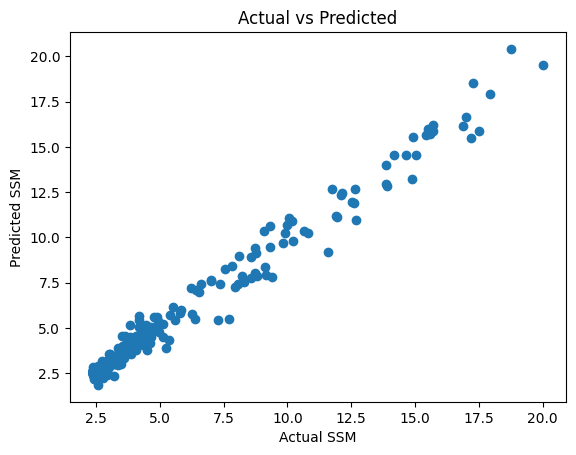

In [19]:
print('Error Parameters of LinearRegression')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SSM')
plt.ylabel('Predicted SSM')
plt.show()


In [20]:
# Step 3: Apply feature scaling to the dataset
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Step 4: Define the SVM regression model with the RBF kernel
svr1 = SVR(kernel='rbf', C=100, gamma=0.1)

# Step 5: Train the SVM model using the training dataset
svr1.fit(X1_train, y1_train)

# Step 6: Evaluate the performance of the trained model using the testing dataset
y1_pred = svr1.predict(X1_test)


Error Parameters of SVM
Mean squared error for SSM: 0.20
Root Mean squared error for SSM: 0.44
Mean Absolute error for SSM: 0.18
Mean Absolute Percentage Error for SSM: 3.93 %



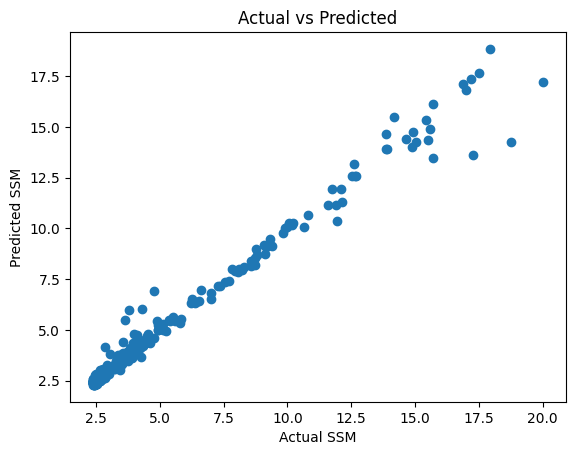

In [21]:


print('Error Parameters of SVM')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SSM')
plt.ylabel('Predicted SSM')
plt.show()


In [22]:
decisionModel1 = DecisionTreeRegressor()


# we are spliting of  the data into training and testing.
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)


decisionModel1.fit(X1_train,y1_train)


y1_pred = decisionModel1.predict(X1_test)


Error Parameters of decisionTree on leve1
Mean squared error for SSM: 0.55
Root Mean squared error for SSM: 0.74
Mean Absolute error for SSM: 0.30
Mean Absolute Percentage Error for SSM: 4.88 %



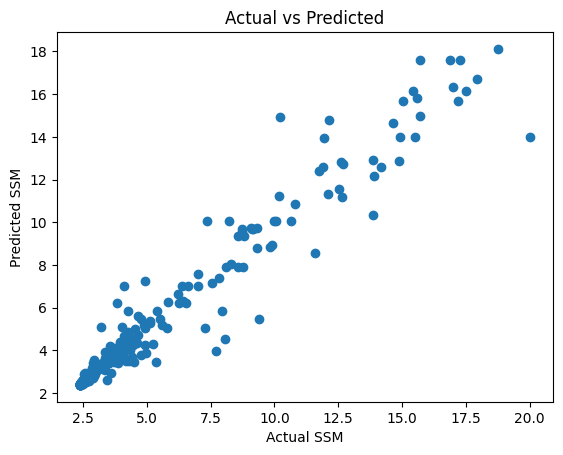

In [23]:
print('Error Parameters of decisionTree on leve1')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SSM')
plt.ylabel('Predicted SSM')
plt.show()


In [24]:
# fit the model and make predictions using randomForest 
Rmodel1 = RandomForestRegressor(n_estimators=100, random_state=42)


Rmodel1.fit(X1_train, y1_train)


y1_pred = Rmodel1.predict(X1_test)


Error Parameters of RandomForest
Mean squared error for SSM: 0.26
Root Mean squared error for SSM: 0.51
Mean Absolute error for SSM: 0.23
Mean Absolute Percentage Error for SSM: 3.88 %



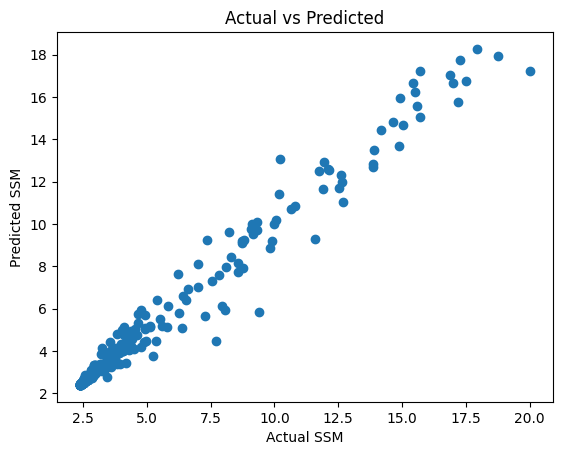

In [25]:
print('Error Parameters of RandomForest')


mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SSM: {:.2f}".format(mse1))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SSM: {:.2f}".format(rmse1))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SSM: {:.2f}".format(mae1))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SSM')
plt.ylabel('Predicted SSM')
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# access to dataset
df = pd.read_csv(path)

df=df.interpolate()
# define X and y variables
X = df.drop(['SSM','SUSM'], axis=1)
# print(X)
y1 = df['SSM']

# reshape the input data to have 3 dimensions (samples, time steps, features)
X = X.values.reshape(X.shape[0], 1, X.shape[1])

# split the data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)


# normalize the input data
scaler = MinMaxScaler()
X1_train_norm = scaler.fit_transform(X1_train.reshape(X1_train.shape[0], -1)).reshape(X1_train.shape)
X1_test_norm = scaler.transform(X1_test.reshape(X1_test.shape[0], -1)).reshape(X1_test.shape)


# build the LSTM model
model1 = Sequential()


model1.add(LSTM(50, input_shape=(X1_train_norm.shape[1], X1_train_norm.shape[2])))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')


# train the model
model1.fit(X1_train_norm, y1_train, epochs=800, batch_size=30, verbose=1)


# evaluate the model
y1_pred = model1.predict(X1_test_norm)
y1_test = y1_test.values.reshape(-1, 1)



Epoch 1/800
59/59 [==============================] - 3s 3ms/step - loss: 24.4208
Epoch 2/800
59/59 [==============================] - 0s 3ms/step - loss: 14.0449
Epoch 3/800
59/59 [==============================] - 0s 3ms/step - loss: 8.6868
Epoch 4/800
59/59 [==============================] - 0s 3ms/step - loss: 7.8184
Epoch 5/800
59/59 [==============================] - 0s 3ms/step - loss: 6.9956
Epoch 6/800
59/59 [==============================] - 0s 3ms/step - loss: 5.9784
Epoch 7/800
59/59 [==============================] - 0s 3ms/step - loss: 4.7429
Epoch 8/800
59/59 [==============================] - 0s 3ms/step - loss: 3.5810
Epoch 9/800
59/59 [==============================] - 0s 3ms/step - loss: 2.6912
Epoch 10/800
59/59 [==============================] - 0s 3ms/step - loss: 2.0644
Epoch 11/800
59/59 [==============================] - 0s 3ms/step - loss: 1.6631
Epoch 12/800
59/59 [==============================] - 0s 3ms/step - loss: 1.4133
Epoch 13/800
59/59 [===============

Error Parameters of LSTM
Mean squared error for SSM: 0.03
Root Mean squared error for SSM: 0.17
Mean Absolute error for SSM: 0.11
Mean Absolute Percentage Error for SSM: 2.76 %



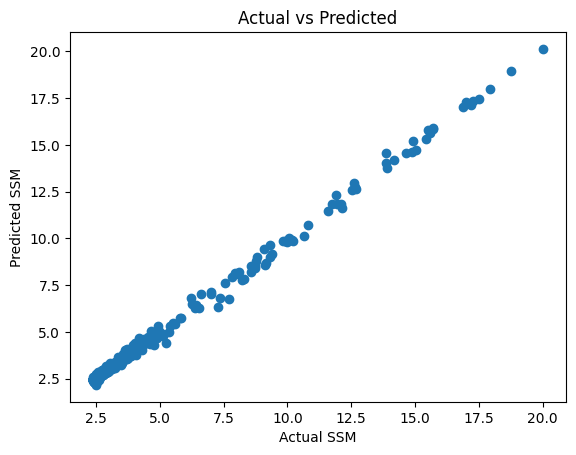

In [27]:
print('Error Parameters of LSTM')

mse1 = MeanSquareError(y1_test, y1_pred)
print("Mean squared error for SSM: {:.2f}".format(mse1[0]))

rmse1 = RootMeanSquareError(y1_test, y1_pred)
print("Root Mean squared error for SSM: {:.2f}".format(rmse1[0]))

mae1 = MeanAbsoluteError(y1_test, y1_pred)
print("Mean Absolute error for SSM: {:.2f}".format(mae1[0]))

mape1 = MeanAbsolutePercentageError(y1_test, y1_pred)
print("Mean Absolute Percentage Error for SSM: {:.2f}".format(mape1)+' %')

print()
# Scatter plot of actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual SSM')
plt.ylabel('Predicted SSM')
plt.show()
